## Customer_Churn_Prediction

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [3]:
# importting the data
data = pd.read_csv("Customer-Churn-Records.csv")

In [3]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

Credit scores range from 300 to 850
* Excellent Credit Score: 800 to 850
* Very Good Credit Score: 740 to 799
* ood Credit Score: 670 to 739
* Fair Credit Score: 580 to 669
* Poor Credit Score: 300 to 579

<Axes: xlabel='Balance', ylabel='Density'>

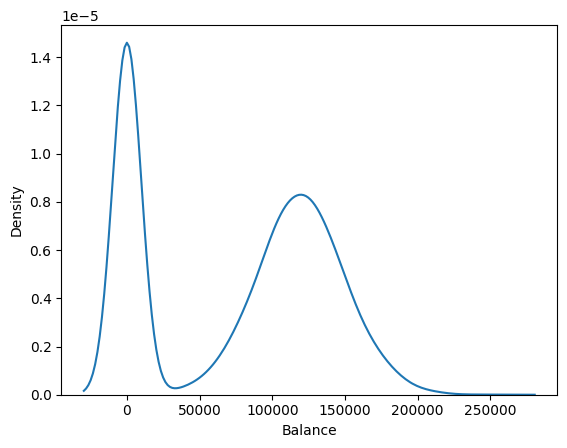

In [6]:
sns.kdeplot(data.Balance)

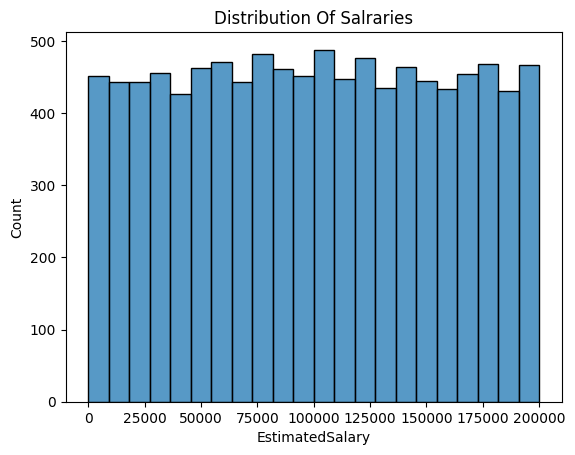

In [7]:

# Create subplots
# fig, axs = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(data.EstimatedSalary)
plt.title("Distribution Of Salraries")

plt.show()

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

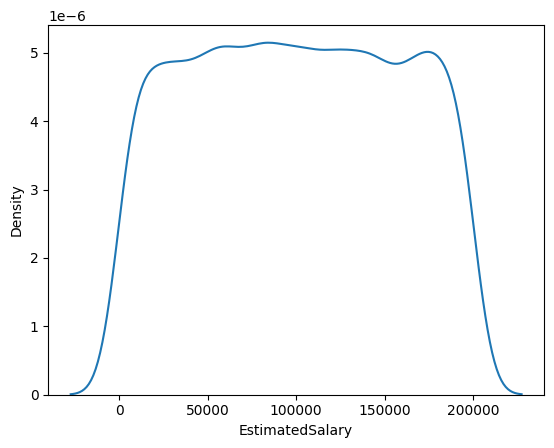

In [8]:
sns.kdeplot(data.EstimatedSalary)


In [9]:
data.sample(4)

RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
9807       9808    15594915       Crist          649    France  Female   36   
4263       4264    15750299     Davison          746     Spain    Male   24   
5578       5579    15726313  Napolitani          687     Spain  Female   50   
3119       3120    15663161        Chiu          680   Germany  Female   51   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9807       8       0.00              2          0               1   
4263      10   68781.82              1          0               1   
5578       5       0.00              2          1               0   
3119       5  143139.87              1          0               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
9807        109179.89       0         0                   3   DIAMOND   
4263         47997.39       0         0                   1    SILVER   
5578        110230.40       0         0                   1  PLATINUM   
3119         47795.43       1         1                   1   DIAMOND   

      Point Earned  
9807           674  
4263           282  
5578           878  
3119           338

## Feature Engineering 

In [10]:
data.drop(columns =["RowNumber" , "CustomerId" , "Surname"] , inplace = True)

In [11]:
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   

   Satisfaction Score Card Type  Point Earned  
0                   2   DIAMOND           464  
1                   3   DIAMOND           456  
2                   3   DIAMOND           377  
3                   5      GOLD           350  
4                   5      GOLD           425

In [12]:
def One_hot_encde(data,column,c2,c3):
    
    encoder = OneHotEncoder(sparse_output=False , drop = 'first')
    encoded_column = encoder.fit_transform(data[[column,c2,c3]])

    # create a dataframe of enocided data

    encoded_df = pd.DataFrame(encoded_column,columns = encoder.get_feature_names_out([column,c2,c3]))

    # mergeing the data 
    new_df = pd.concat([data,encoded_df], axis = 1)

    return new_df
    


In [13]:
Encoded_df = One_hot_encde(data,'Geography','Gender','Card Type')

In [14]:
Encoded_df.drop(columns = ['Geography','Gender','Card Type'],inplace = True)

In [15]:
Encoded_df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Complain  Satisfaction Score  \
0               1        101348.88       1         1                   2   
1               1        112542.58       0         1                   3   
2               0        113931.57       1         1                   3   
3               0         93826.63       0         0                   5   
4               1         79084.10       0         0                   5   

   Point Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0           464                0.0              0.0          0.0   
1           456                0.0              1.0          0.0   
2           377                0.0              0.0          0.0   
3           350                0.0              0.0          0.0   
4           425                0.0              1.0          0.0   

   Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER  
0             0.0                 0.0               0.0  
1             0.0                 0.0               0.0  
2             0.0                 0.0               0.0  
3             1.0                 0.0               0.0  
4             1.0                 0.0               0.0

### It is an imbalnced datasset, 80% custmers are in one category and 20 % of the custermes are in 1 category 

In [16]:
Encoded_df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [17]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif_data

# Example usage
# Load your data and make sure it includes only the independent variables
# df = pd.read_csv('your_data.csv')
# If your dataset has independent variables in columns X1, X2, X3...
# df = df[['X1', 'X2', 'X3']]  # select relevant columns

vif = calculate_vif(Encoded_df.drop(columns=['Exited']))
print(vif)


               Feature        VIF
0          CreditScore  25.138311
1                  Age  14.121124
2               Tenure   3.897907
3              Balance   3.213269
4        NumOfProducts   7.988876
5            HasCrCard   3.304887
6       IsActiveMember   2.153268
7      EstimatedSalary   3.911703
8             Complain   1.478173
9   Satisfaction Score   5.299186
10        Point Earned   7.566945
11   Geography_Germany   1.817875
12     Geography_Spain   1.486988
13         Gender_Male   2.199775
14      Card Type_GOLD   1.968171
15  Card Type_PLATINUM   1.957851
16    Card Type_SILVER   1.958263


In [18]:
# We will be dropping these column beacause of high vif more that 10
vif[vif['VIF'] > 10]

Feature        VIF
0  CreditScore  25.138311
1          Age  14.121124

In [19]:
Encoded_df.drop(columns = ['CreditScore' , 'Age'],inplace=True)

In [20]:
Encoded_df

Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score  Point Earned  \
0           101348.88       1         1                   2           464   
1           112542.58       0         1                   3           456   
2           113931.57       1         1                   3           377   
3            93826.63       0         0                   5           350   
4            79084.10       0         0                   5           425   
...               ...     ...       ...                 ...           ...   
9995         96270.64       0         0                   1           300   
9996        101699.77       0         0                   5           771   
9997         42085.58       1         1                   3           564   
9998         92888.52       1         1                   2           339   
9999         38190.78       0         0                   3           911   

      Geography_Germany  Geography_Spain  Gender_Male  Card Type_GOLD  \
0                   0.0              0.0          0.0             0.0   
1                   0.0              1.0          0.0             0.0   
2                   0.0              0.0          0.0             0.0   
3                   0.0              0.0          0.0             1.0   
4                   0.0              1.0          0.0             1.0   
...                 ...              ...          ...             ...   
9995                0.0              0.0          1.0             0.0   
9996                0.0              0.0          1.0             0.0   
9997                0.0              0.0          0.0             0.0   
9998                1.0              0.0          1.0             1.0   
9999                0.0              0.0          0.0             0.0   

      Card Type_PLATINUM  Card Type_SILVER  
0                    0.0               0.0  
1                    0.0               0.0  
2                    0.0               0.0  
3                    0.0               0.0  
4                    0.0               0.0  
...                  ...               ...  
9995                 0.0               0.0  
9996                 1.0               0.0  
9997                 0.0               1.0  
9998                 0.0               0.0  
9999                 0.0               0.0  

[10000 rows x 16 columns]

# Creating a file for model bulding


In [25]:
Encoded_df.to_csv("Preprocessed_data.csv",index=False)

# Experimenting with data 

In [ ]:
# Features and target

X = Encoded_df.drop(columns=['Exited']) 
y = Encoded_df['Exited']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(penalty='l1',random_state=42,solver='saga',l1_ratio= 1,max_iter=500)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
# y_pred_log_reg_train = log_reg.predict(X_train_scaled)  

# Evaluation
print("Logistic Regression Results:")
print("Traning_model_accuracy = " , log_reg.score(X_train_scaled,y_train))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

In [82]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Perform stratified cross validation
scores = cross_val_score(log_reg, X, y, cv=skf, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracies for each fold: ", scores)
print("Mean accuracy across all folds: ", scores.mean())

C:\Program Files\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Program Files\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Program Files\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Program Files\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Program Files\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Program Files\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

Accuracies for each fold:  [0.796 0.796 0.796 0.796 0.796 0.796 0.796 0.796 0.797 0.797]
Mean accuracy across all folds:  0.7962


C:\Program Files\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [120]:
# ROC 
from sklearn.metrics import roc_curve

y_scores = log_reg.predict_proba(X_test)[:,1]
y_scores

C:\Program Files\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

In [121]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [125]:
thresholds

array([            inf, 4.75494471e-040, 1.84316751e-091, 4.85716079e-104,
       4.86501942e-109, 7.07931039e-114, 5.23735402e-115, 3.57686939e-116,
       1.29724980e-116, 3.00496986e-117, 3.25467978e-136, 4.38520120e-140,
       9.80875103e-144, 9.08874506e-149, 4.61117337e-153, 8.25905097e-159,
       1.61884218e-169, 1.42779976e-170, 2.80224934e-180, 4.82699976e-182,
       2.41066782e-190, 4.25491500e-197, 6.44247447e-205, 6.34370999e-205,
       9.17824488e-208, 2.52173599e-208, 6.36061242e-226, 9.97066874e-231,
       1.00927559e-235, 4.08545079e-236, 1.22287843e-258, 2.04359842e-259,
       2.76591858e-276, 7.36349438e-279, 1.28919529e-279, 3.91962537e-280,
       1.93579419e-298, 5.79364787e-299, 2.80093739e-304, 0.00000000e+000])

In [129]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.002 , 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['saga'],
    'l1_ratio': [0, 0.5, 1 , 1.5],  # Only used for 'elasticnet'
    'max_iter': [100, 500, 800, 1000]  # Number of iterations
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")


Best parameters: {'C': 0.001, 'l1_ratio': 0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy: 0.9985000000000002


C:\Program Files\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


420 fits failed out of a total of 1680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Program Files\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Program Files\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Program Files\Lib\site-packages\sklearn\utils\_param_validation.py"

In [32]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=5)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))




Random Forest Results:
Accuracy: 0.9985
Confusion Matrix:
 [[1605    2]
 [   1  392]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [8]:
data['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64